In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
games = pd.read_csv("games.csv")
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [8]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [10]:
games.shape

(81312, 20)

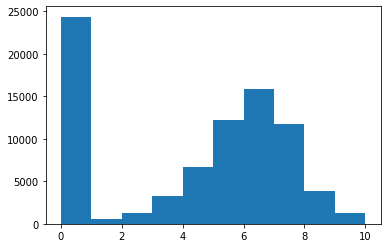

In [12]:
plt.hist(games['average_rating'])
plt.show()

In [15]:
print(games[games['average_rating']==0].iloc[0])
print(games[games['average_rating'] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

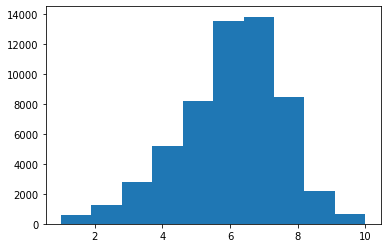

In [16]:
games = games[games['average_rating'] > 0]
games = games.dropna(axis=0)

plt.hist(games['average_rating'])
plt.show()

In [17]:
games.shape

(56894, 20)

In [18]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56894 entries, 0 to 81279
Data columns (total 20 columns):
id                      56894 non-null int64
type                    56894 non-null object
name                    56894 non-null object
yearpublished           56894 non-null float64
minplayers              56894 non-null float64
maxplayers              56894 non-null float64
playingtime             56894 non-null float64
minplaytime             56894 non-null float64
maxplaytime             56894 non-null float64
minage                  56894 non-null float64
users_rated             56894 non-null int64
average_rating          56894 non-null float64
bayes_average_rating    56894 non-null float64
total_owners            56894 non-null int64
total_traders           56894 non-null int64
total_wanters           56894 non-null int64
total_wishers           56894 non-null int64
total_comments          56894 non-null int64
total_weights           56894 non-null int64
average_weight  

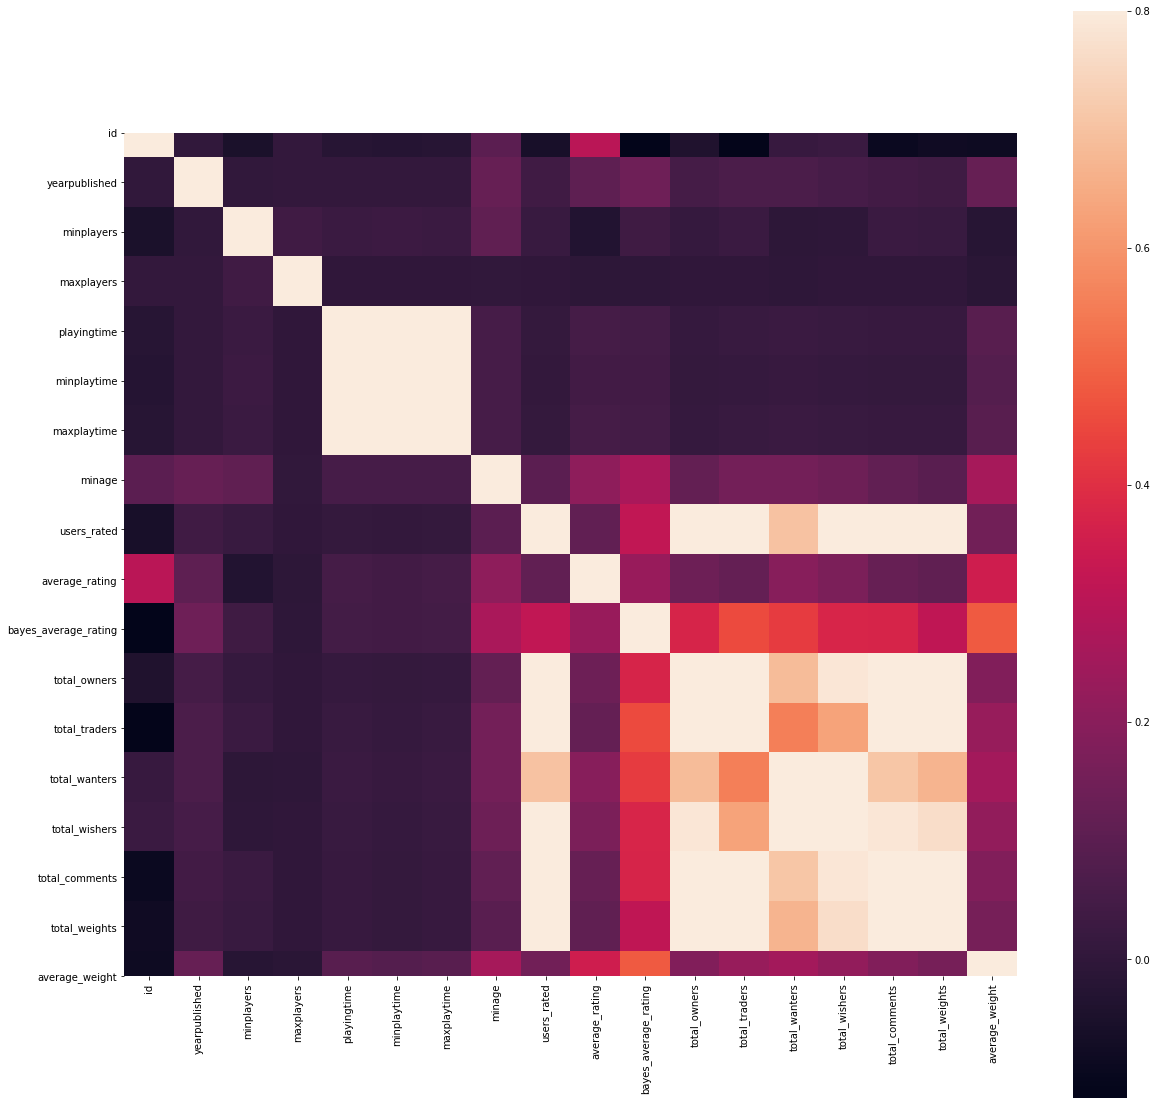

In [21]:
corrmat = games.corr()
fig = plt.figure(figsize=(20,20))

sns.heatmap(corrmat, vmax=0.8, square = True)
plt.show()

In [27]:
columns = games.columns.to_list()
columns = [c for c in columns if c not in ['id','type','name','average_rating', 'bayes_average_rating']]

In [32]:
columns

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [28]:
target = 'average_rating'

In [29]:
train = games.sample(frac=0.8, random_state=1)
test = games.loc[~games.index.isin(train.index)]

print(train.shape, test.shape)

(45515, 20) (11379, 20)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
predictions = LR.predict(test[columns])
error = mean_squared_error(predictions, test[target])

In [35]:
error

2.078819032629326

In [37]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators= 100, min_samples_leaf=10, random_state=1)
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [38]:
predictions_rf = RFR.predict(test[columns])
error_rf = mean_squared_error(predictions_rf, test[target])
error_rf

1.4458560046071653

In [41]:
example = test[columns].iloc[0]

In [42]:
LR.predict(example.values.reshape(1,-1))

array([8.12061283])

In [43]:
RFR.predict(example.values.reshape(1,-1))

array([7.91373581])

In [44]:
test[target].iloc[0]

8.07933